**1. Clasificación de imágenes de ropa con codelab**

a) Importar el set de datos de moda de MNIST, explore el set de datos.

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist # importar dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # explorar el ds: (images, labels)
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] # 10 clases

print(x_train.shape) # arrays de imagenes
print(x_test.shape) 

print(y_train) # array de etiquetas
print(y_test)
# Escalar valores de imagenes en un rango de 0 a 1 
x_train = x_train / 255.0
x_test = x_test / 255.0

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


b. Pre-procese el set de Datos, Construir el modelo

60000
28


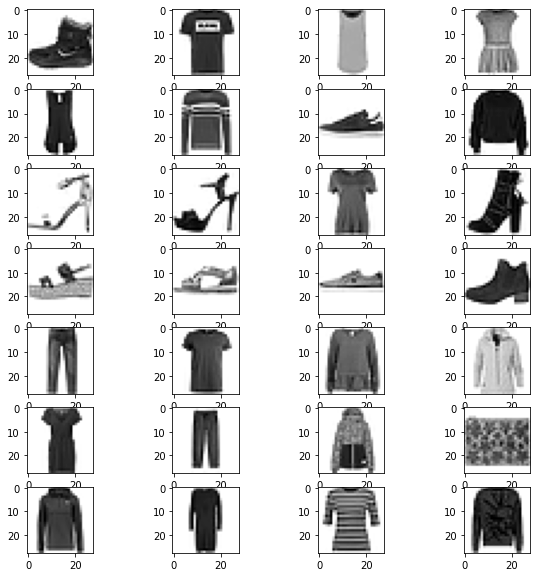

In [43]:
print(len(x_train))  # filas
print(len(x_train[0])) # columnas 
col = len(x_train[0]) # 28

plt.figure(figsize=(10,10))
for i in range(0, col):
  plt.subplot(7,4,i+1) # distribuir el total de modelos un grid de 7 filas, 4 columnas
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)  
plt.show()

# configurar las capas
model= keras.Sequential([
  keras.layers.Flatten(input_shape=(col,col)), # primera capa que transforma el arreglo bidimensional en unidimensional en valores [0,1]
  keras.layers.Dense(128, activation='relu'), # 128 neuronas de la primera capa
  keras.layers.Dense(10, activation='softmax') # 10 tipos de datos, cada uno tendra una clasificacion
 ])

# compilacion
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c. Entrenar el modelo, evaluar exactitud

In [54]:
#model.fit(x_train, y_train, epochs=10) # evaluar(imagenes, etiquetas)) de entrenamiento
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) # evaluar(imagenes, etiquetas)) de test
print('Test accuracy:',test_acc)

# el modelo alcanza una exactitud de %88.8

313/313 - 0s - loss: 0.3901 - accuracy: 0.8880
Test accuracy: 0.8880000114440918


d. Hacer predicciones

In [52]:
# una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo
# sobre las imagenes de cada uno de los 10 articulos de moda/ropa. 

predictions = model.predict(x_test)
 # para la prediccion 0, la que tiene el nivel mas alto de confianza: bota de talon
print(class_names[np.argmax(predictions[0])])
# para la prediccion 1, la que tiene el nivel mas alto de confianza: sueter
print(class_names[np.argmax(predictions[1])])



Ankle boot
Pullover
